<a href="https://colab.research.google.com/github/wars2/acoplamento-quartico-anomalo/blob/main/Acoplamento_4Anomalo_WWCEP_modificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#!python3 -m pip install --user mplhep
!pip install --user mplhep
import mplhep as hep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
PATH = '/content/drive/MyDrive/IC/dados/dados_ic_23-6-2022/'
raiz_s = 13000
plt.style.use([hep.style.ROOT, hep.style.firamath])

# Abrindo eventos de Background + Dados

In [5]:
def open_file_back( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 0

        df_cut = (df[b'muon_pt'] > 53) & (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138) & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'jet_eta'] < 2.4) & (df[b'jetAK8_tau21'] < 0.6) & (df[b'METPt'] > 40) & (df[b'W_Mass'] > 500) & (df[b'W_pt_lep'] > 200) & (df[b'dphi_jet_MET'] > 2) & (df[b'dphi_jet_lep'] > 2)
        dset = df[df_cut]
        return dset

In [6]:
Drell_Yan = open_file_back(PATH + 'DataSet_multiRP_DrellYan.h5')
QCD = open_file_back(PATH + 'DataSet_multiRP_QCD.h5')
Single_top = open_file_back(PATH + 'DataSet_multiRP_single_top.h5')
VV_Inclusivo = open_file_back(PATH + 'DataSet_multiRP_VV_inclusivo.h5')
W_Jets = open_file_back(PATH + 'DataSet_multiRP_WJets.h5')
TT_bar = open_file_back(PATH + 'DataSet_TTbar.h5')

data = open_file_back(PATH + 'DataSet_dados_multiRP.h5')

concat = pd.concat([Drell_Yan, QCD, Single_top, VV_Inclusivo, W_Jets, TT_bar])

# Corrigindo as colunas do Background
Deixando os nomes das variáveis iguais

In [7]:
columns_ = [ b'W_Mass', b'W_pt_lep', b'dPhi_Whad_Wlep',b'dPhi_jatos_MET', b'jetAK8_pt', b'jetAK8_eta',
                b'jetAK8_prunedMass',      b'jetAK8_tau21',             b'METPt',
                b'muon_pt',          b'muon_eta',       b'ExtraTracks',
               b'PUWeight',        b'W_rapidity',              b'btag',
                b'xi1',               b'xi2',b'ismultirp1',        b'ismultirp2',
                b'Norm',
                  b'weight',              b'Mpps',              b'Ypps',
                b'Mww/Mpps',          b'Ypps-Yww', b'label']

In [8]:
DrellYan = pd.DataFrame( np.array(Drell_Yan),columns=columns_ )
QCD_ = pd.DataFrame( np.array(QCD),columns=columns_ )
SingleTop = pd.DataFrame( np.array(Single_top),columns=columns_ )
VVInclusivo = pd.DataFrame( np.array(VV_Inclusivo),columns=columns_ )
Wjets = pd.DataFrame( np.array(W_Jets),columns=columns_ )
TTbar = pd.DataFrame( np.array(TT_bar),columns=columns_ )

concat_back = pd.concat([DrellYan, QCD_, SingleTop, VVInclusivo, Wjets, TTbar])

concat_back[b'label'] = 0

# Abrindo eventos de Sinal + Modelo Padrão

In [9]:
def open_file_signal( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 1

        df_cut = (df[b'muon_pt'] > 53) & (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138) & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'jetAK8_eta'] < 2.4) & (df[b'jetAK8_tau21'] < 0.6) & (df[b'METPt'] > 40) & (df[b'W_Mass'] > 500) & (df[b'W_pt_lep'] > 200) & (df[b'METPt'] > 2) & (df[b'dPhi_Whad_Wlep'] > 2)
        dset = df[df_cut]
        return dset



def open_file_SM( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 2

        df_cut = (df[b'muon_pt'] > 53) & (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138) & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'jetAK8_eta'] < 2.4) & (df[b'jetAK8_tau21'] < 0.6) & (df[b'METPt'] > 40) & (df[b'W_Mass'] > 500) & (df[b'W_pt_lep'] > 200) & (df[b'METPt'] > 2) & (df[b'dPhi_Whad_Wlep'] > 2)
        dset = df[df_cut]
        return dset


In [10]:
A01 = open_file_signal( PATH + 'output-DataSet_ANOMALO1_multiRP.h5' )
A02 = open_file_signal( PATH + 'output-DataSet_ANOMALO2_multiRP.h5' )
A03 = open_file_signal( PATH + 'output-DataSet_ANOMALO3_multiRP.h5' )
A04 = open_file_signal( PATH + 'output-DataSet_ANOMALO4_multiRP.h5' )
A05 = open_file_signal( PATH + 'output-DataSet_ANOMALO5_multiRP.h5' )
A06 = open_file_signal( PATH + 'output-DataSet_ANOMALO6_multiRP.h5' )
A07 = open_file_signal( PATH + 'output-DataSet_ANOMALO7_multiRP.h5' )
A08 = open_file_signal( PATH + 'output-DataSet_ANOMALO8_multiRP.h5' )

SM = open_file_SM( PATH + 'output-SM_multiRP.h5' )

# Montando os Plots

Text(0.5, 1.0, 'Signal')

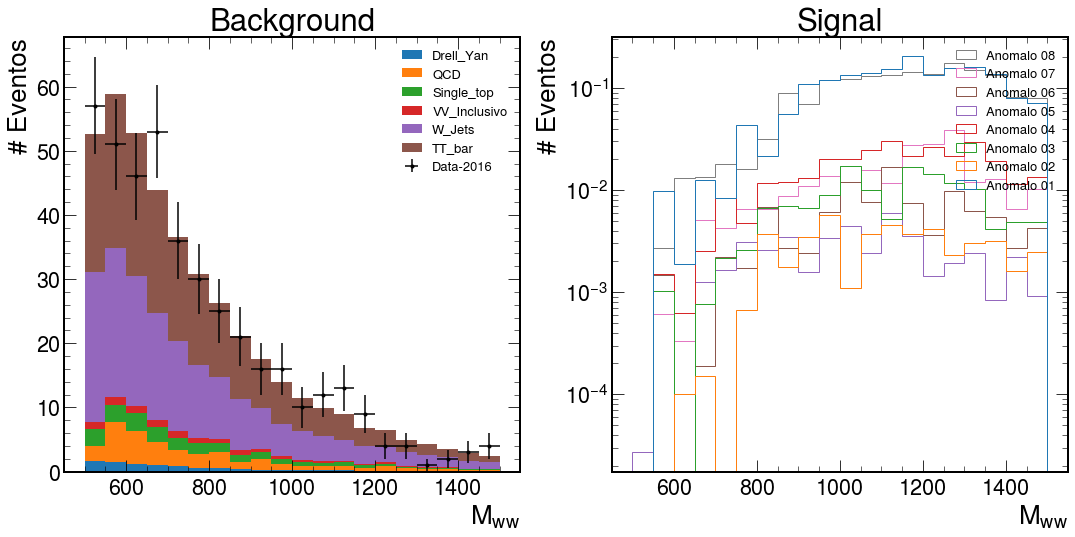

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'W_Mass' 
range_ = (500, 1500)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados no Background
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('$M_{ww}$')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('$M_{ww}$')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

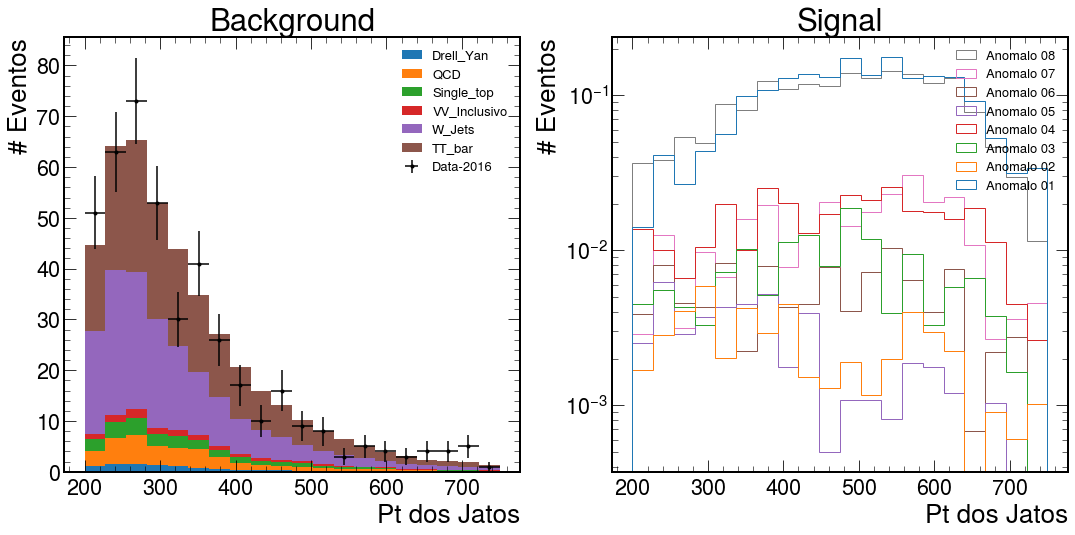

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'jetAK8_pt' 
range_ = (200, 750)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Pt dos Jatos')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Pt dos Jatos')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

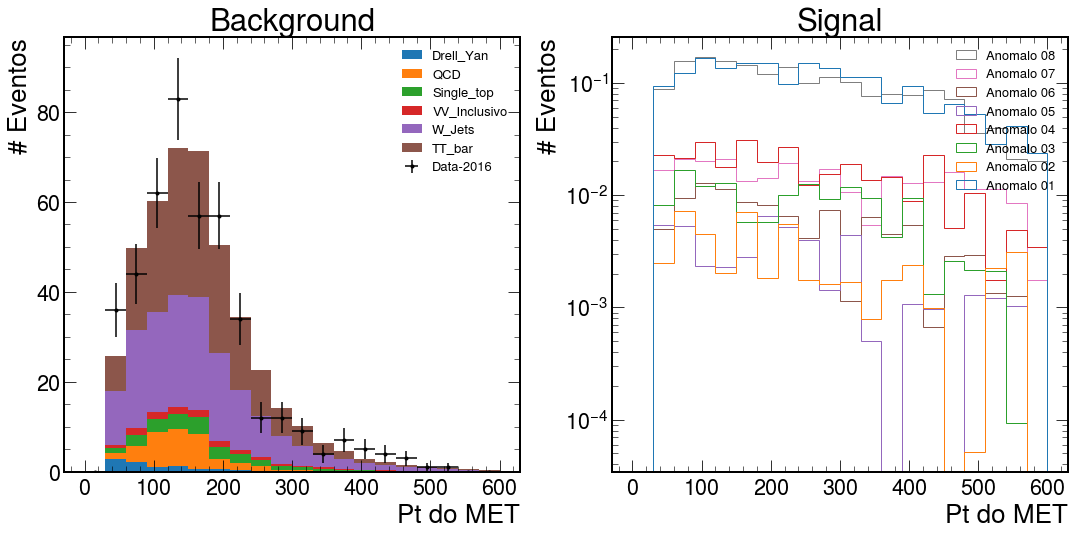

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'METPt' 
range_ = (0, 600)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Pt do MET')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Pt do MET')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

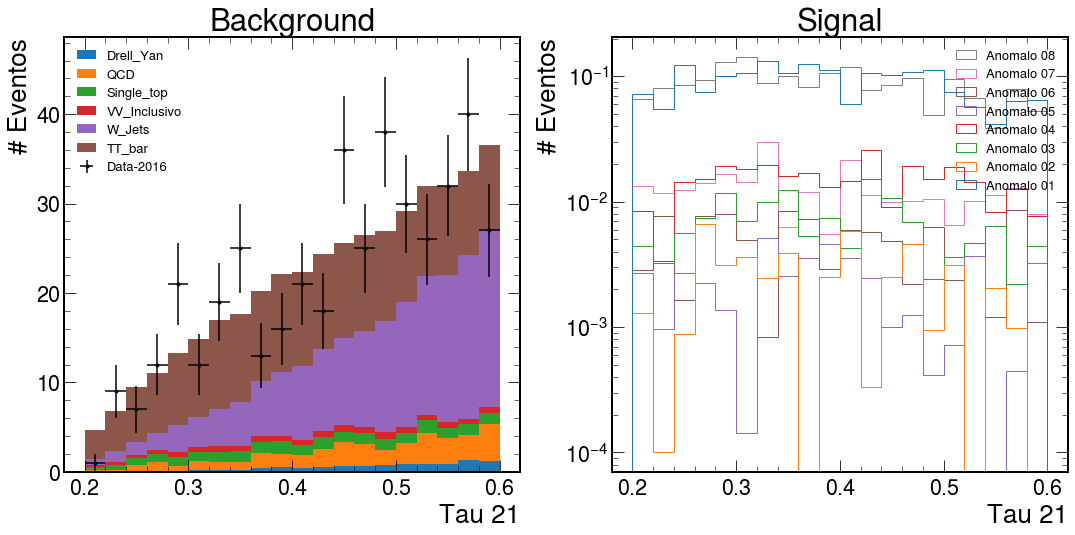

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'jetAK8_tau21' 
range_ = (0.2, 0.6)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Tau 21')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Tau 21')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

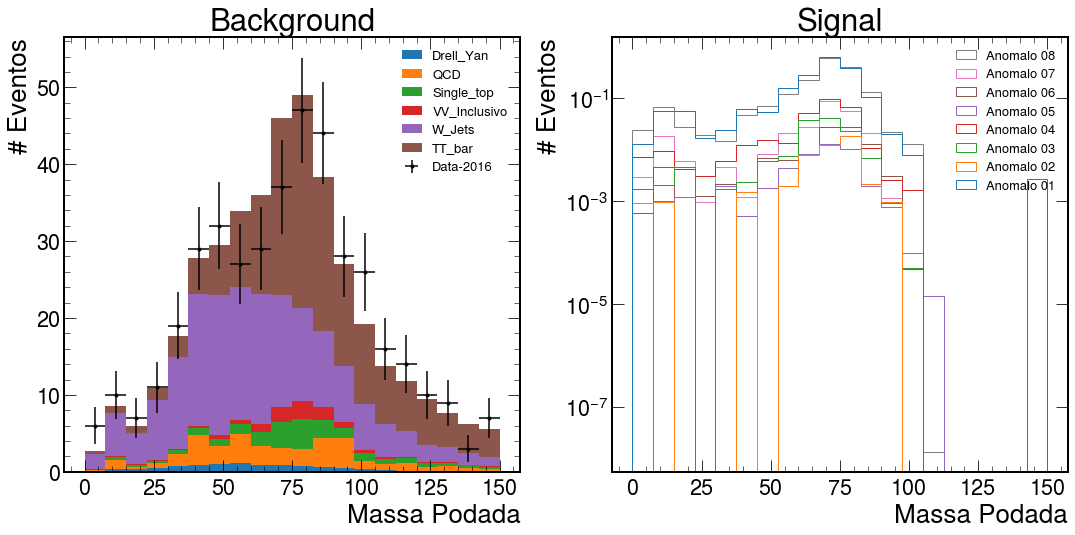

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'jetAK8_prunedMass' 
range_ = (0, 150)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Massa Podada')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Massa Podada')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

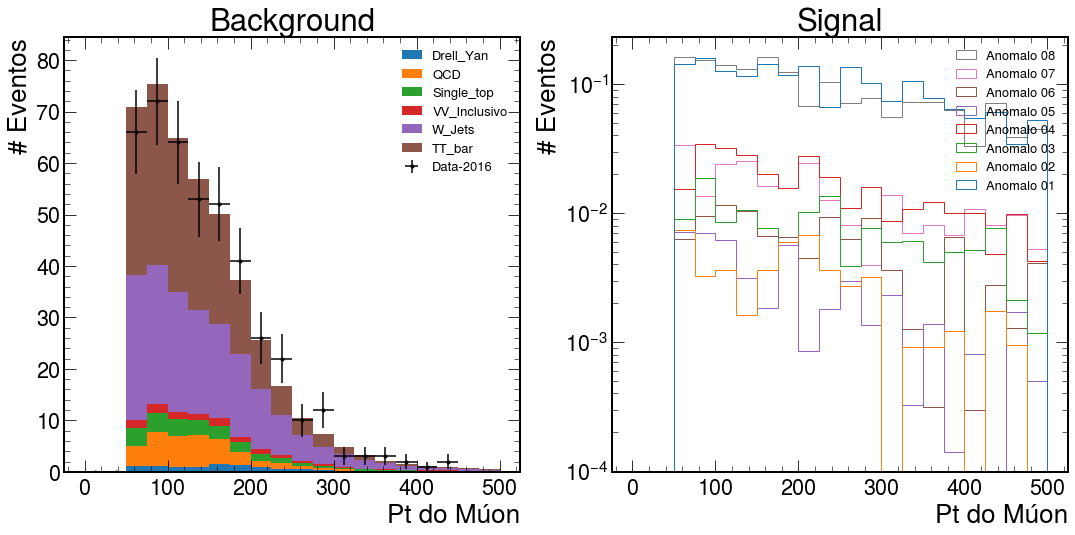

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'muon_pt' 
range_ = (0, 500)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Pt do Múon')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Pt do Múon')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

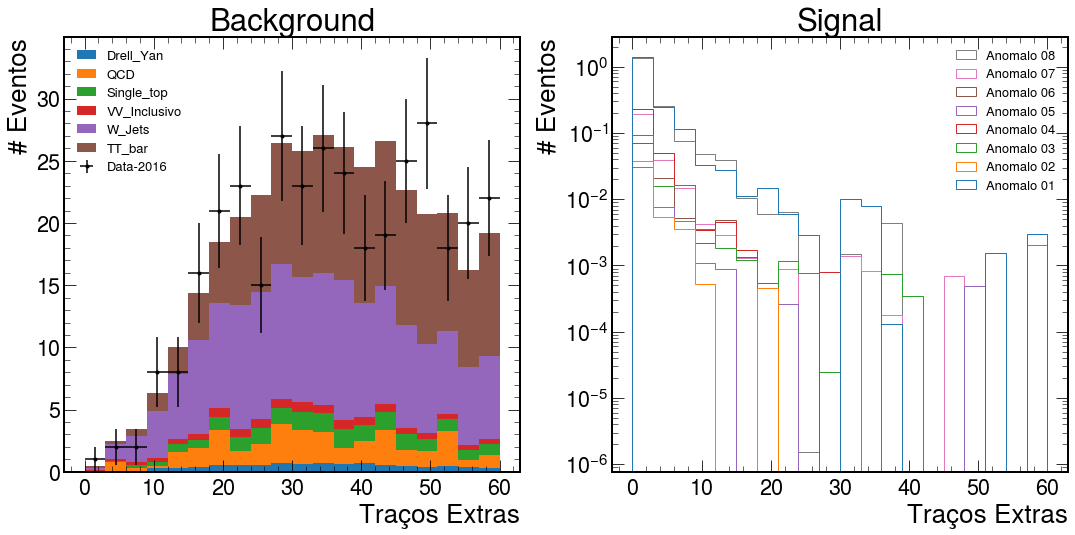

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'ExtraTracks' 
range_ = (0, 60)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Traços Extras')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Traços Extras')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

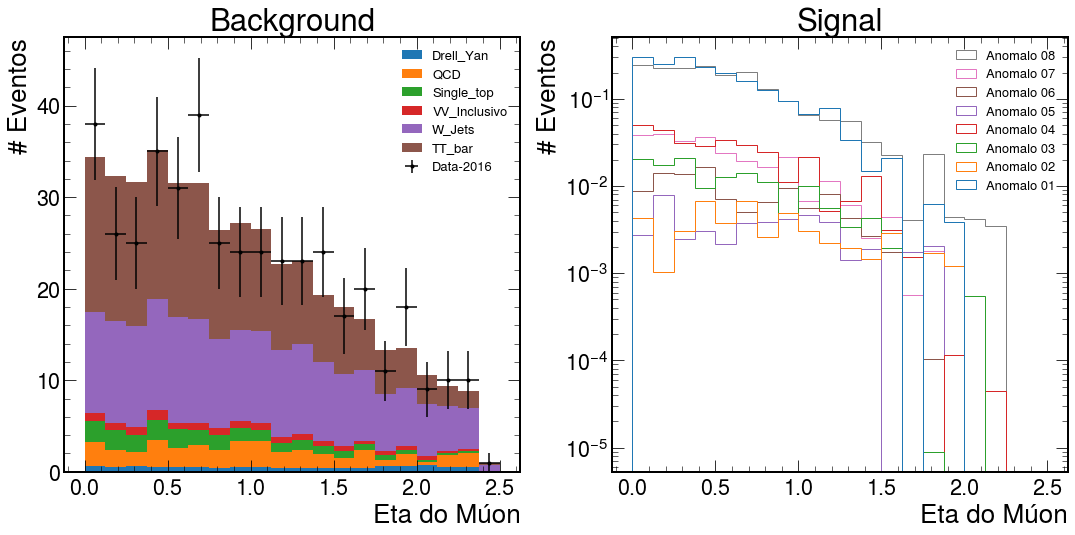

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'muon_eta' 
range_ = (0, 2.5)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Eta do Múon')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Eta do Múon')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

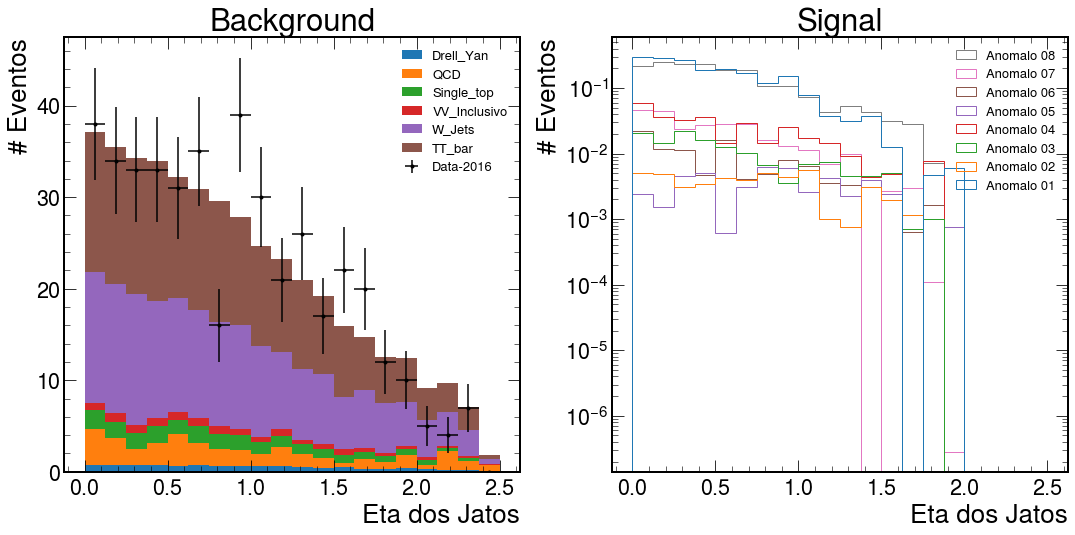

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'jetAK8_eta'
var1 = b'jet_eta'
range_ = (0, 2.5)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var1] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Eta dos Jatos')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Eta dos Jatos')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

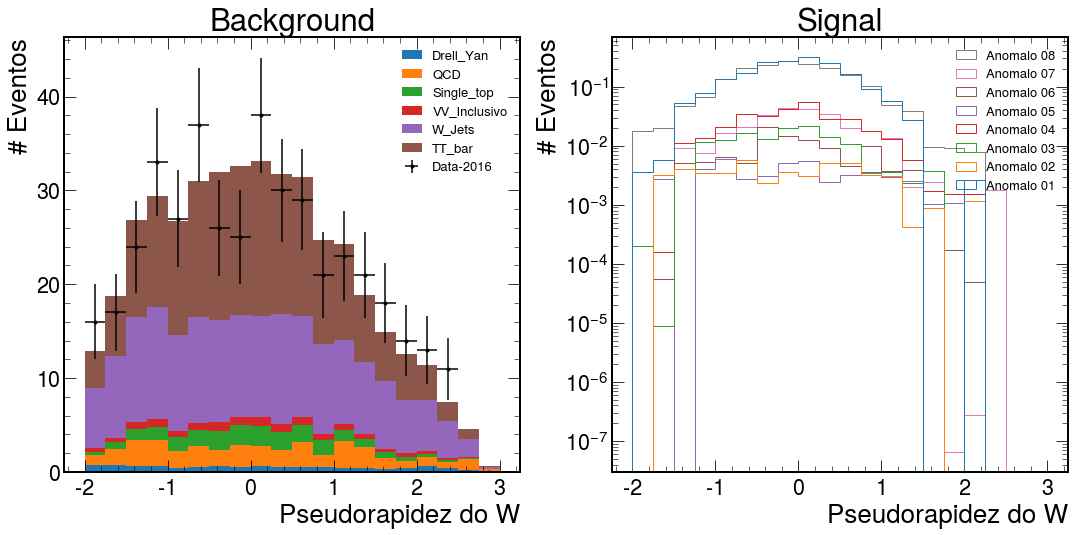

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'W_rapidity'
range_ = (-2, 3)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Pseudorapidez do W')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Pseudorapidez do W')
plt.ylabel('# Eventos')
plt.title('Signal')



In [ ]:
data.columns

Index([           b'W_Mass',          b'W_pt_lep',      b'dphi_jet_lep',
            b'dphi_jet_MET',         b'jetAK8_pt',           b'jet_eta',
       b'jetAK8_prunedMass',      b'jetAK8_tau21',             b'METPt',
                 b'muon_pt',          b'muon_eta',       b'ExtraTracks',
                b'PUWeight',        b'W_rapidity',              b'btag',
                     b'xi1',               b'xi2',        b'ismultirp1',
              b'ismultirp2',              b'Mpps',              b'Ypps',
                b'Mww/Mpps',          b'Ypps-Yww',             b'label'],
      dtype='object')

Text(0.5, 1.0, 'Signal')

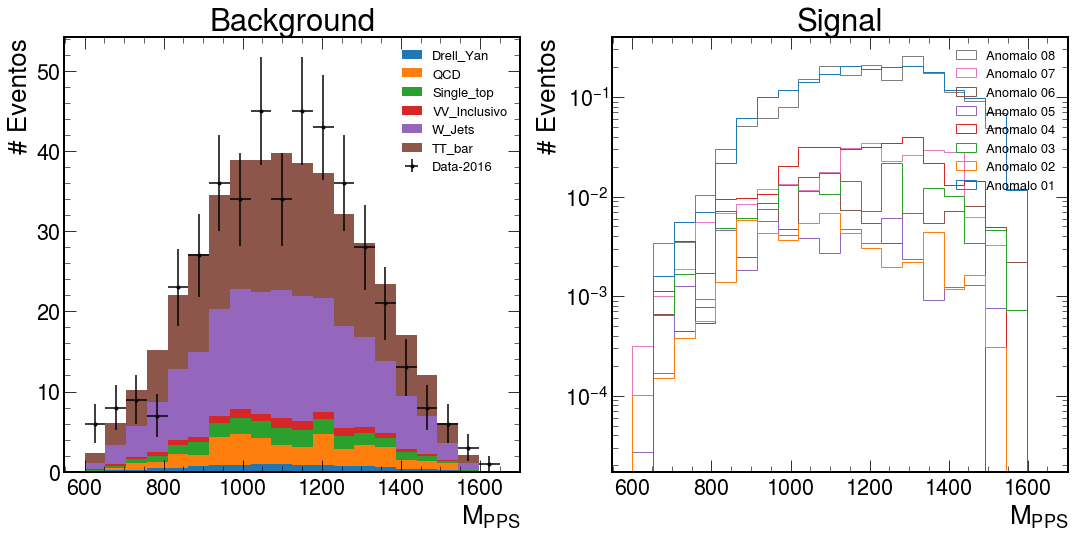

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'Mpps'
range_ = (600, 1650)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('$M_{PPS}$')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('$M_{PPS}$')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

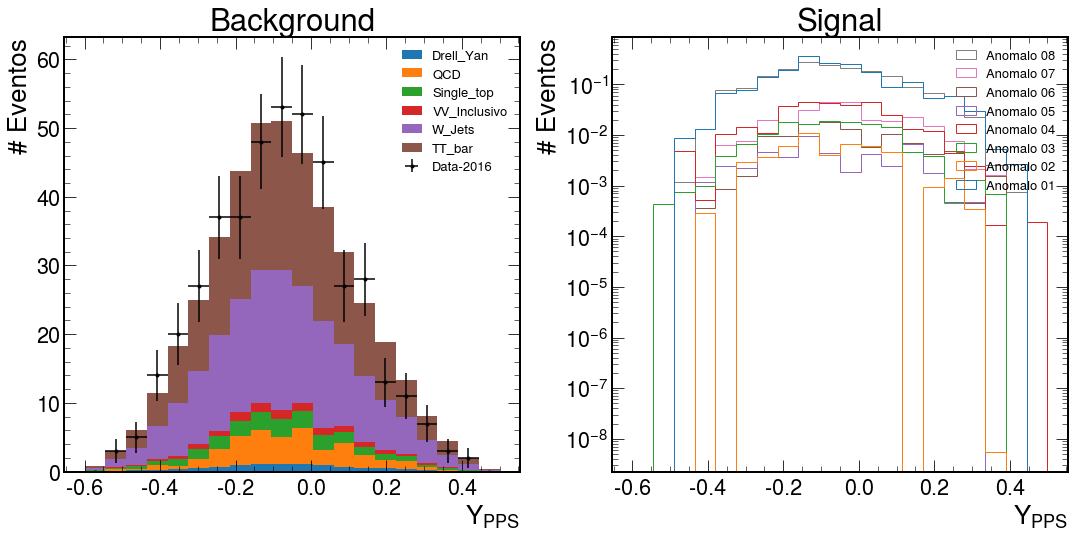

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'Ypps'
range_ = (-0.6, 0.5)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('$Y_{PPS}$')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('$Y_{PPS}$')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

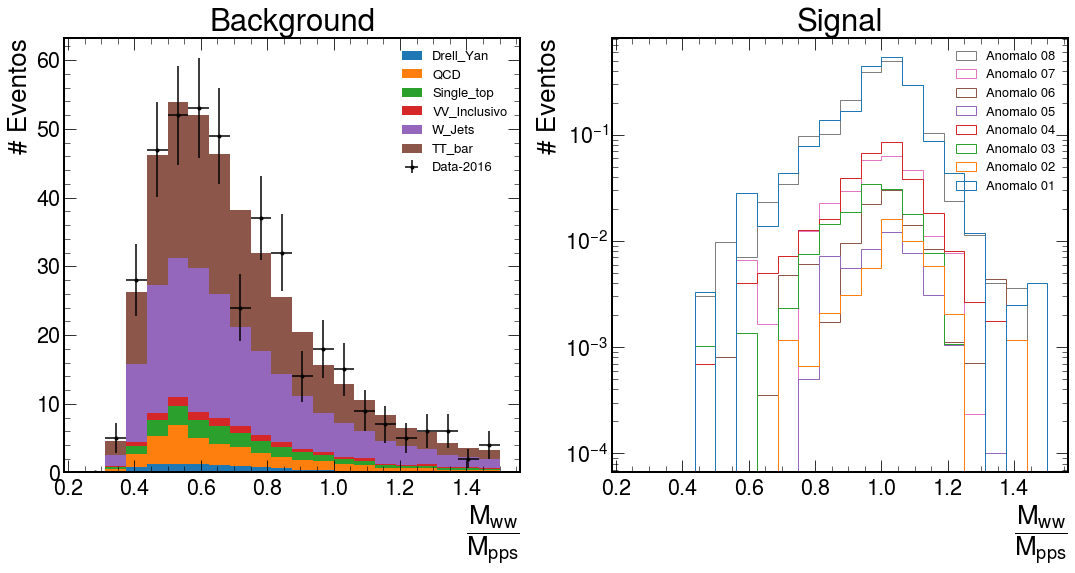

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'Mww/Mpps'
range_ = (0.25, 1.5)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('$\dfrac{\mathcal{M}_{ww}}{\mathcal{M}_{pps}}$')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('$\dfrac{\mathcal{M}_{ww}}{\mathcal{M}_{pps}}$')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

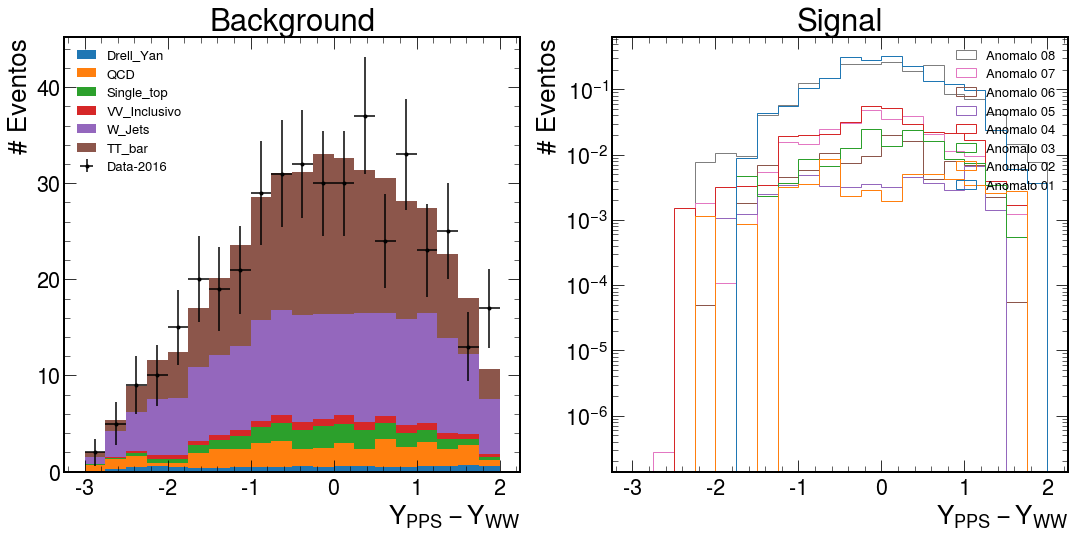

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'Ypps-Yww'
range_ = (-3, 2)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('$Y_{PPS}-Y_{WW}$')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('$Y_{PPS}-Y_{WW}$')
plt.ylabel('# Eventos')
plt.title('Signal')



# preparando o dataset para inserção na rede neural

In [38]:
comum = list(set(concat_back.columns).intersection(A01.columns))
print(comum)
print(len(comum))

[b'Mww/Mpps', b'label', b'METPt', b'PUWeight', b'ismultirp2', b'W_Mass', b'Norm', b'Ypps-Yww', b'ExtraTracks', b'xi2', b'W_pt_lep', b'Ypps', b'muon_eta', b'W_rapidity', b'dPhi_jatos_MET', b'jetAK8_eta', b'jetAK8_pt', b'xi1', b'ismultirp1', b'dPhi_Whad_Wlep', b'btag', b'muon_pt', b'Mpps', b'weight', b'jetAK8_tau21', b'jetAK8_prunedMass']
26


In [45]:
A01_filtrado=A01.filter(comum, axis=1)
copia=concat_back.copy()
back_A01=pd.concat([concat_back, A01_filtrado], ignore_index=True) #sera que não ordenar o indice interfere no treinamento?
back_A01.head()

,b'W_Mass',b'W_pt_lep',b'dPhi_Whad_Wlep',b'dPhi_jatos_MET',b'jetAK8_pt',b'jetAK8_eta',b'jetAK8_prunedMass',b'jetAK8_tau21',b'METPt',b'muon_pt',...,b'xi2',b'ismultirp1',b'ismultirp2',b'Norm',b'weight',b'Mpps',b'Ypps',b'Mww/Mpps',b'Ypps-Yww',b'label'
0,1004.200826,246.120173,2.937833,2.958131,373.942699,0.184228,55.062477,0.571314,186.140570,60.136734,...,0.055096,1.0,1.0,0.103731,0.005340,933.827340,0.265257,1.075360,-2.012286,0
1,526.408395,257.885326,3.091246,3.113035,260.352607,0.082333,34.196247,0.574820,173.642389,84.369019,...,0.095019,1.0,1.0,0.103731,0.000001,1066.947416,-0.146473,0.493378,-0.160866,0
2,550.971475,230.774493,2.885788,2.256019,297.520478,0.012844,26.852690,0.510523,59.120557,186.278641,...,0.096801,1.0,1.0,0.103731,0.009568,1156.292141,-0.084632,0.476499,-0.459092,0
3,578.221005,207.439374,3.042000,2.876895,281.021543,0.150954,33.618019,0.484481,54.753107,153.694534,...,0.113396,1.0,1.0,0.103731,0.000017,1190.220894,-0.213942,0.485810,0.802274,0
4,575.953046,222.157730,2.773283,2.753688,231.744925,0.314940,80.144310,0.459501,158.536515,63.727394,...,0.121808,1.0,1.0,0.103731,0.007813,940.096560,-0.521413,0.612653,0.533806,0


# rede neural

In [56]:
#ref: https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
# Binary Classification with Sonar Dataset: Baseline
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [58]:
# load dataset
dataframe = back_A01.copy()
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:25].astype(float)
Y = dataset[:,25]

In [59]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [62]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(25, input_shape=(25,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [66]:
# evaluate model with standardized dataset
modelo=create_baseline()
estimator = KerasClassifier(model=modelo, epochs=20, batch_size=20, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 99.90% (0.04%)


In [78]:
# serialize model to JSON
model_json = modelo.to_json()
with open("Background+Anomalo01.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelo.save_weights("Background+Anomalo01.h5")
print("Saved model to disk")

Saved model to disk
